# Actividad 1 -vuelos

1. Carga el dataset `'flights'` usando el comando
         sns.load_dataset('flights')
2. Representa acumulando por años una serie temporal.
3. Representa agregando por meses un factorplot donde se pueda ver la evolución de pasajeros en cada mes a lo largo de los diferentes años.
4. Representa las distribuciones de pasajeros a lo largo de los meses en los diferentes años con densidad, sin histograma y  con rugplot para observar si se pueden considerar iguales.
5. Pivota la matriz generando un nuevo DataFrame en el que el índice de filas sean los meses, el de columnas los años y el contenido el número de pasajeros.
Haz un `heatmap` con el comando `sns.heatmap`. ¿ En qué zonas y qué años se tiene mayor afluencia de pasajeros?

In [1]:
import seaborn as sns
import numpy as np
%matplotlib inline

dat=sns.load_dataset('flights')
dat.head()
dat.index=dat['year']
print(dat.shape)
dat.head()

(144, 3)


,year,month,passengers
year,,,
1949,1949,January,112
1949,1949,February,118
1949,1949,March,132
1949,1949,April,129
1949,1949,May,121


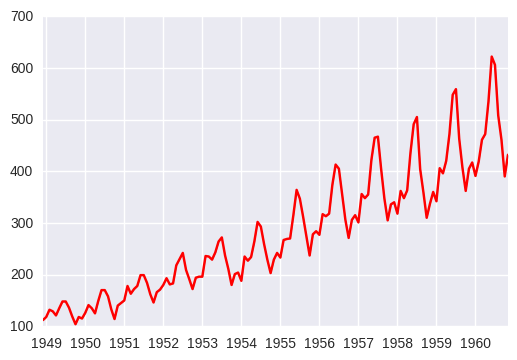

In [2]:
g=sns.tsplot(dat['passengers'],color='red');
g.set_xticklabels(np.arange(1949,1961,1));
#g.set_xticks(dat['year']);
g.set_xticks(np.arange(1,144,12));

In [3]:
datpivot = dat.pivot("month", "year", "passengers")
datpivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


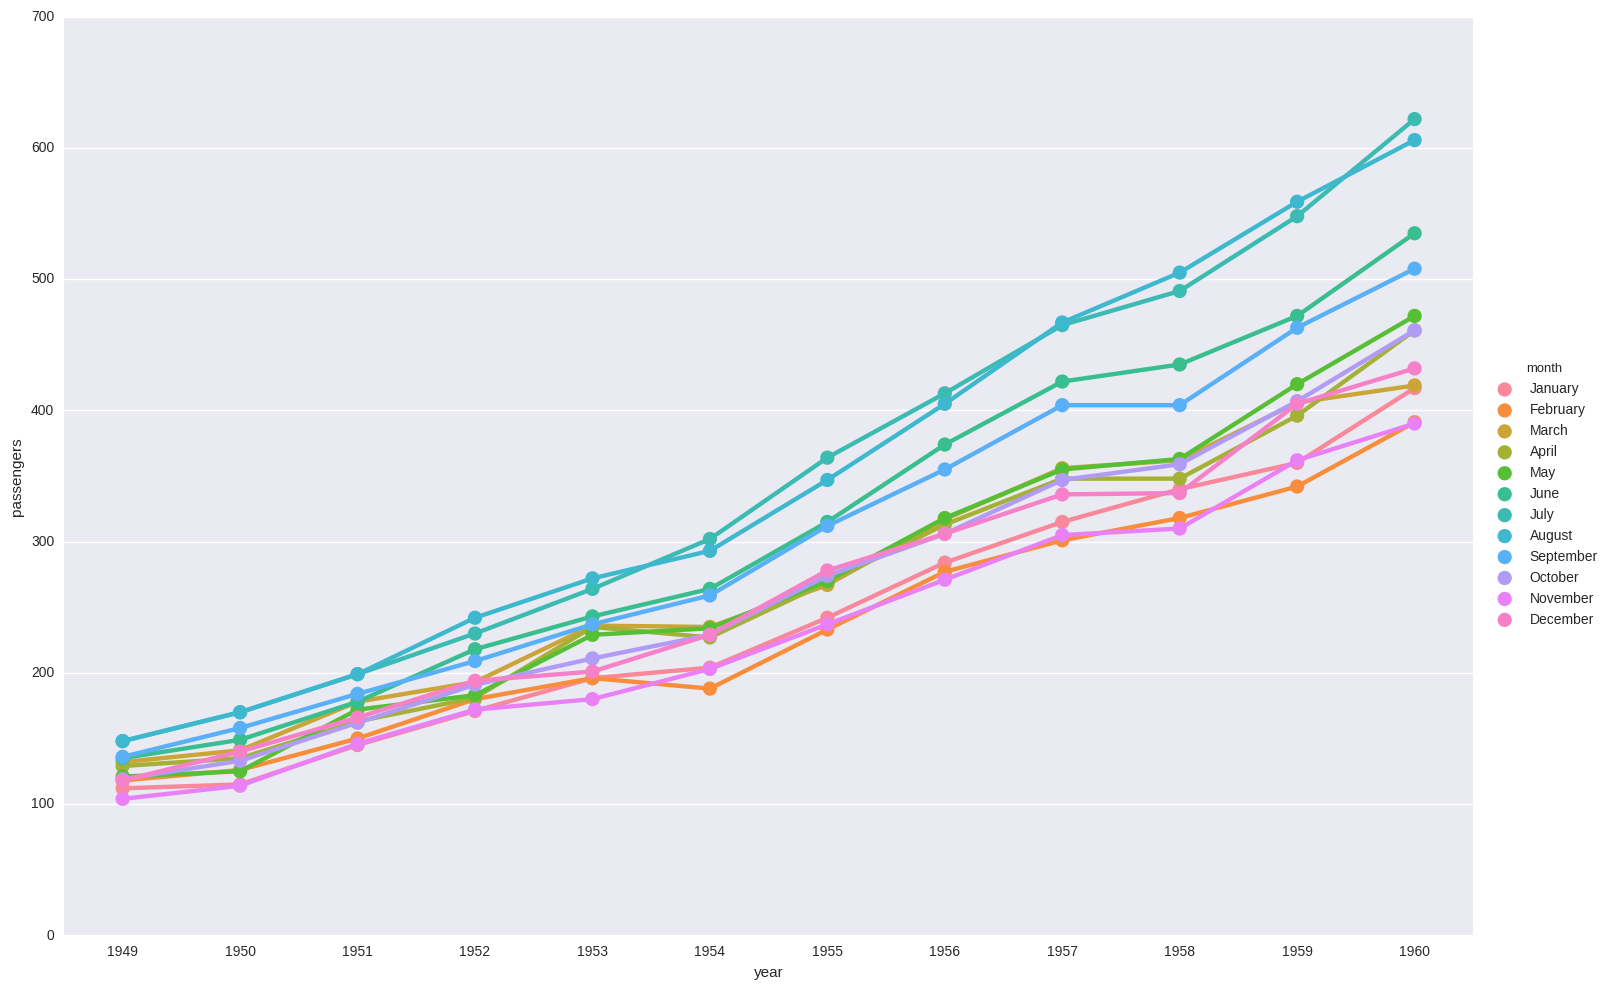

In [4]:
sns.factorplot('year','passengers',data=dat,hue='month',size=10,aspect=1.5);

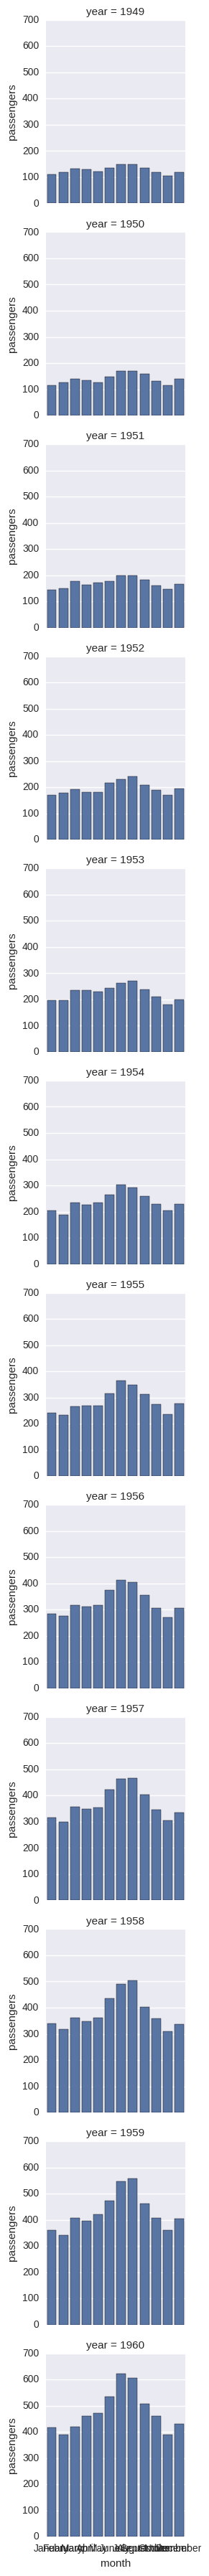

In [5]:
g=sns.FacetGrid(dat,row='year');
g.map(sns.barplot,"month",'passengers');

Se aprecia que entorno a 1960 y los meses de junio-agosto son los más solicitados.

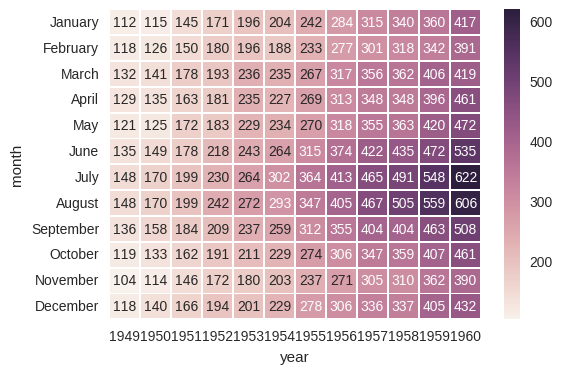

In [6]:
sns.heatmap(datpivot, annot=True, fmt="d", linewidths=.5);